In [1]:
#ссылка на гит репозиторий: 
#импортируем все библиотеки
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model, metrics
from sklearn.svm import SVR
from sklearn import ensemble

In [2]:
#импортируем данные
data = pd.read_csv("train.csv", parse_dates = ['date'])
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [3]:
jsonO = data['totals'].map(str).apply(json.loads)
data['visits'] = jsonO.apply(lambda x: x['visits']) #кол-во посещений маг
data['hits'] = jsonO.apply(lambda x: x['hits']) #кол-во удачных посещений

jsonO = data['device'].map(str).apply(json.loads)
data['browser'] = jsonO.apply(lambda x: x['browser']) 
data['isMobile'] = jsonO.apply(lambda x: x['isMobile'])

jsonO = data['geoNetwork'].map(str).apply(json.loads)
data['country'] = jsonO.apply(lambda x: x['country'])
data['city'] = jsonO.apply(lambda x: x['city'])

data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,visits,hits,browser,isMobile,country,city
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,1,1,Chrome,False,Turkey,Izmir
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,1,1,Firefox,False,Australia,not available in demo dataset
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,1,1,Chrome,False,Spain,Madrid
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,1,1,UC Browser,False,Indonesia,not available in demo dataset
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,1,1,Chrome,True,United Kingdom,not available in demo dataset


In [4]:
#еще нам нужна выручка, она должна быть в столбце transactionRevenue, но там нет
data['transactionRevenue'] = jsonO.apply(lambda x: x['transactionRevenue']) #выручка

KeyError: 'transactionRevenue'

In [5]:
#Надо спрогнозировать выручку, но значения выручки не находятся (см пред ячейку), поэтому решила добавить новый столбец, который рандомно генерирует значения от 150 до 2000 
data['transactionRevenue'] = np.random.randint(150, 2000, data.shape[0])
data.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,visits,hits,browser,isMobile,country,city,transactionRevenue
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,1,1,Chrome,False,Turkey,Izmir,451
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,1,1,Firefox,False,Australia,not available in demo dataset,1492
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,1,1,Chrome,False,Spain,Madrid,1956
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,1,1,UC Browser,False,Indonesia,not available in demo dataset,1659
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,1,1,Chrome,True,United Kingdom,not available in demo dataset,1811


In [6]:
#уберем  ненужные json столбцы
df = data.drop(['device', 'geoNetwork', 'totals', 'trafficSource'], axis = 1)
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,visits,hits,browser,isMobile,country,city,transactionRevenue
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,1,1,Chrome,False,Turkey,Izmir,451
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,1,1,Firefox,False,Australia,not available in demo dataset,1492
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,1,1,Chrome,False,Spain,Madrid,1956
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,1,1,UC Browser,False,Indonesia,not available in demo dataset,1659
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,1,1,Chrome,True,United Kingdom,not available in demo dataset,1811


In [7]:
#возьмем 10% данных 
df.sample(frac = 0.1)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,visits,hits,browser,isMobile,country,city,transactionRevenue
770629,Paid Search,2017-07-10,1420484894038948596,1420484894038948596_1499697217,Not Socially Engaged,1499697217,3,1499697217,1,1,Chrome,True,United States,not available in demo dataset,943
391649,Social,2016-11-02,5902141068692601556,5902141068692601556_1478151913,Not Socially Engaged,1478151913,1,1478151913,1,3,Safari,False,Vietnam,Hanoi,1231
806819,Direct,2017-03-02,4494066459936283882,4494066459936283882_1488521243,Not Socially Engaged,1488521243,1,1488521243,1,1,Chrome,True,South Africa,Randburg,1218
191907,Paid Search,2016-11-22,3554905786065334881,3554905786065334881_1479865426,Not Socially Engaged,1479865426,1,1479865426,1,5,Edge,False,United States,not available in demo dataset,1218
519628,Organic Search,2017-01-25,9926546090041326775,9926546090041326775_1485374509,Not Socially Engaged,1485374509,4,1485374509,1,1,Chrome,True,France,not available in demo dataset,1559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,Social,2016-09-02,8968955632695149927,8968955632695149927_1472845703,Not Socially Engaged,1472845703,5,1472845703,1,1,Chrome,False,Tunisia,Tunis,1071
184649,Referral,2016-11-28,2828378569881426310,2828378569881426310_1480322161,Not Socially Engaged,1480322161,2,1480322161,1,1,Chrome,False,Singapore,(not set),1043
64764,Organic Search,2017-08-01,1933634293342529288,1933634293342529288_1501624393,Not Socially Engaged,1501624393,2,1501624393,1,2,Chrome,False,United States,Mountain View,1602
166481,Organic Search,2016-10-21,628430846653140334,628430846653140334_1477068899,Not Socially Engaged,1477068899,2,1477068899,1,1,Safari,True,United States,New York,1038


In [8]:
df.info()
#видим, что пустых значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   channelGrouping       903653 non-null  object        
 1   date                  903653 non-null  datetime64[ns]
 2   fullVisitorId         903653 non-null  object        
 3   sessionId             903653 non-null  object        
 4   socialEngagementType  903653 non-null  object        
 5   visitId               903653 non-null  int64         
 6   visitNumber           903653 non-null  int64         
 7   visitStartTime        903653 non-null  int64         
 8   visits                903653 non-null  object        
 9   hits                  903653 non-null  object        
 10  browser               903653 non-null  object        
 11  isMobile              903653 non-null  bool          
 12  country               903653 non-null  object        
 13 

In [9]:
df.describe()
#видим, что отрицательных значений нет

,visitId,visitNumber,visitStartTime,transactionRevenue
count,9.036530e+05,903653.000000,9.036530e+05,903653.000000
mean,1.485007e+09,2.264897,1.485007e+09,1074.405756
std,9.022124e+06,9.283735,9.022124e+06,533.952172
min,1.470035e+09,1.000000,1.470035e+09,150.000000
25%,1.477561e+09,1.000000,1.477561e+09,613.000000
50%,1.483949e+09,1.000000,1.483949e+09,1074.000000
75%,1.492759e+09,1.000000,1.492759e+09,1537.000000
max,1.501657e+09,395.000000,1.501657e+09,1999.000000


In [10]:
#присвоим 1 - если тру, 0 - если фолс
df['isMobile'] = df['isMobile'].astype(int)
#еще посчитать логарифм от выручки
df['log_revenue'] = np.log(df['transactionRevenue'])
df

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,visits,hits,browser,isMobile,country,city,transactionRevenue,log_revenue
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,1,1,Chrome,0,Turkey,Izmir,451,6.111467
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,1,1,Firefox,0,Australia,not available in demo dataset,1492,7.307873
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,1,1,Chrome,0,Spain,Madrid,1956,7.578657
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,1,1,UC Browser,0,Indonesia,not available in demo dataset,1659,7.413970
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,1,1,Chrome,1,United Kingdom,not available in demo dataset,1811,7.501634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,Social,2017-01-04,5123779100307500332,5123779100307500332_1483554750,Not Socially Engaged,1483554750,1,1483554750,1,17,Chrome,0,Puerto Rico,not available in demo dataset,1832,7.513164
903649,Social,2017-01-04,7231728964973959842,7231728964973959842_1483543798,Not Socially Engaged,1483543798,1,1483543798,1,18,Chrome,1,Sri Lanka,not available in demo dataset,491,6.196444
903650,Social,2017-01-04,5744576632396406899,5744576632396406899_1483526434,Not Socially Engaged,1483526434,1,1483526434,1,24,Android Webview,1,South Korea,Seoul,318,5.762051
903651,Social,2017-01-04,2709355455991750775,2709355455991750775_1483592857,Not Socially Engaged,1483592857,1,1483592864,1,24,Chrome,0,Indonesia,not available in demo dataset,1605,7.380879


In [11]:
#поменяем тип логарифма выручки с флот на инт
df['log_revenue'] = df['log_revenue'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   channelGrouping       903653 non-null  object        
 1   date                  903653 non-null  datetime64[ns]
 2   fullVisitorId         903653 non-null  object        
 3   sessionId             903653 non-null  object        
 4   socialEngagementType  903653 non-null  object        
 5   visitId               903653 non-null  int64         
 6   visitNumber           903653 non-null  int64         
 7   visitStartTime        903653 non-null  int64         
 8   visits                903653 non-null  object        
 9   hits                  903653 non-null  object        
 10  browser               903653 non-null  object        
 11  isMobile              903653 non-null  int32         
 12  country               903653 non-null  object        
 13 

# Построение моделей

In [16]:
#разбиение на обучающую и тестовую
X = df[['visitNumber', 'hits', 'isMobile', 'visits']].to_numpy()
Y = df['log_revenue'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

### Линейная регрессия

In [17]:
#строим модель
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#делаем предсказание
lr_predictions = linear_regressor.predict(X_test)

In [19]:
#выведем значения тестовой выборки
print (y_test)

[6 5 7 ... 7 7 7]


In [20]:
#выведем значения получившиеся после прогноза (видим, что они в принципе близки)
print (lr_predictions)

[6.35055773 6.34908945 6.35034024 ... 6.35055773 6.34887574 6.3504471 ]


In [21]:
#кросс валидация k-fold на 5 фолдов 
#видим, что в среднем наша ошибка = 6 с отклонением = 1 (число отр потому что по метрика уменьшается, когда модель становится лучше)
linear_scoring = cross_val_score(linear_regressor, X, Y, cv=5)
print (linear_scoring)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

[-6.53807843e-06  3.88030503e-06 -9.93287510e-06 -2.50823135e-05
  7.49665776e-06]
mean: -6.035260845616009e-06, std: 1.1486215253005158e-05


{'whiskers': [<matplotlib.lines.Line2D at 0x28e5ea71648>,
 'caps': [<matplotlib.lines.Line2D at 0x28e5ea67088>,
 'boxes': [<matplotlib.lines.Line2D at 0x28e5ea6e0c8>],
 'medians': [<matplotlib.lines.Line2D at 0x28e5ea64148>],
 'fliers': [<matplotlib.lines.Line2D at 0x28e5ea64608>],
 'means': []}

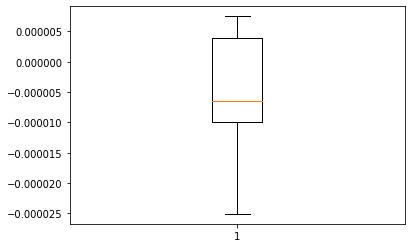

In [22]:
plt.boxplot(linear_scoring)

### Случайный лес

In [23]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [24]:
rf_predictions = random_forest.predict(X_test)

In [25]:
print (y_test)
print (rf_predictions)

[6 5 7 ... 7 7 7]
[6.34447224 6.3490038  6.35023929 ... 6.34447224 6.3481055  6.36026991]


In [26]:
rf_scoring = cross_val_score(random_forest, X, Y, cv=5)
print (rf_scoring)
print ('mean: {}, std: {}'.format(rf_scoring.mean(), rf_scoring.std()))

[-0.00421032 -0.004556   -0.00517883 -0.00419613 -0.00478438]
mean: -0.004585132574042828, std: 0.00037008886577703635


{'whiskers': [<matplotlib.lines.Line2D at 0x28e5ea2c948>,
 'caps': [<matplotlib.lines.Line2D at 0x28e5ea26048>,
 'boxes': [<matplotlib.lines.Line2D at 0x28e5ea269c8>],
 'medians': [<matplotlib.lines.Line2D at 0x28e5ea23288>],
 'fliers': [<matplotlib.lines.Line2D at 0x28e5ea20048>],
 'means': []}

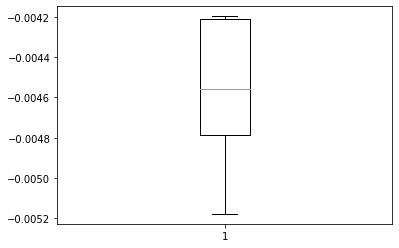

In [27]:
plt.boxplot(rf_scoring)

### Градиентный бустинг

In [28]:
gradient_boosting = ensemble.GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
gb_predictions = gradient_boosting.predict(X_test)

In [30]:
print (y_test)
print (gb_predictions)

[6 5 7 ... 7 7 7]
[6.35263555 6.34864661 6.34933544 ... 6.35263555 6.34889089 6.35210924]


In [31]:
gb_scoring = cross_val_score(gradient_boosting, X, Y, cv=5)
print (gb_scoring)
print ('mean: {}, std: {}'.format(gb_scoring.mean(), gb_scoring.std()))

[-1.37202455e-04 -1.89933585e-04 -1.56585636e-04 -1.11444458e-04
 -7.29231822e-05]
mean: -0.0001336178633286167, std: 3.971733275632048e-05


{'whiskers': [<matplotlib.lines.Line2D at 0x28e5e9e5bc8>,
 'caps': [<matplotlib.lines.Line2D at 0x28e5e9e5088>,
 'boxes': [<matplotlib.lines.Line2D at 0x28e5e9e8508>],
 'medians': [<matplotlib.lines.Line2D at 0x28e5e9e2408>],
 'fliers': [<matplotlib.lines.Line2D at 0x28e5e9e22c8>],
 'means': []}

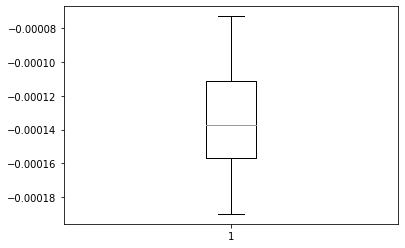

In [32]:
plt.boxplot(gb_scoring)

### SVR

In [ ]:
svr = SVR(kernel='linear')
svr = svr.fit(X_train, y_train)

In [ ]:
svr_predictions = svr.predict(X_test)

In [ ]:
print (y_test)
print (svr_predictions)

In [ ]:
svr_scoring = cross_val_score(svr, X, Y, cv=5)
print (svr_scoring)
print ('mean: {}, std: {}'.format(svr_scoring.mean(), svr_scoring.std()))

In [ ]:
plt.boxplot(svr_scoring)